# Szkolenie ML/AI 2

### **Uczenie nadzorowane (ang. supervised learning)**

Dane uczące przekazywane algorytmowi zawierają pole z rozwiązaniem problemu (tzw. etygietę [ang. label]).

***Problem klasyfikacji*** (ang. classification): przyporządkowanie wektorowi cech jego *klasy*.

Przykład: 

| Czy szczeka? | Wielkość | Ilość kończyn | Waga    | Etykieta |
|--------------|----------|---------------|---------|----------|
| Tak          | Średnia  | 4             | Średnia | Pies     |
| Nie          | Mała     | 4             | Mała    | Kot      |
| Nie          | Duża     | 4             | Duża    | Krowa    |
|--------------|----------|---------------|---------|----------|
| Nie          | Mała     | 2             | Mała    | ???      |


### Przykład zbiór irysów

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/Iris_decription.png" alt="drawing" style="width:900:"/>
</div>

<div style="text-align: center;">
    <img src="Zdjęcia/Szkolenie_2/>
</div>

In [1]:
import pandas as pd
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Wczytanie danych jako "tablica / macierz"
data = pd.read_csv("Datasets/Iris.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.shape

(150, 6)

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
# Wyrzucenie niepotrzebnej kolumny ID
data.drop('Id',axis=1,inplace=True)

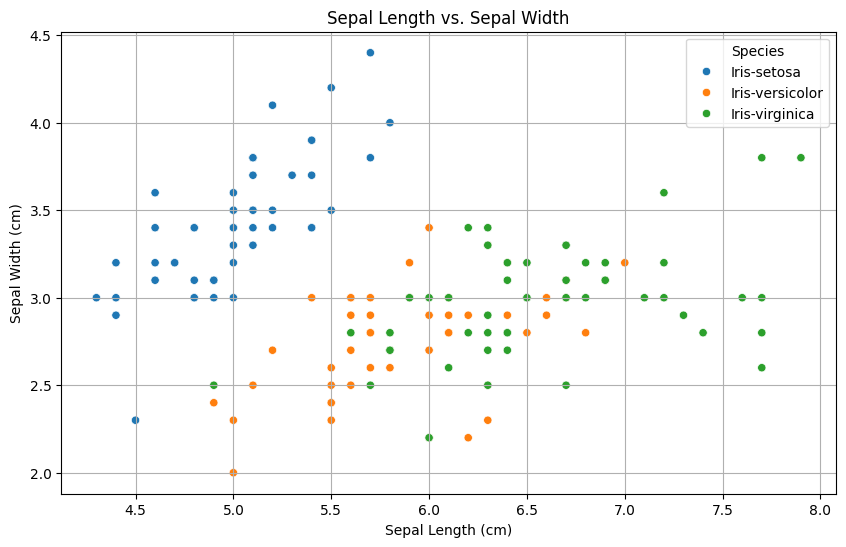

In [9]:
# Wykres 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

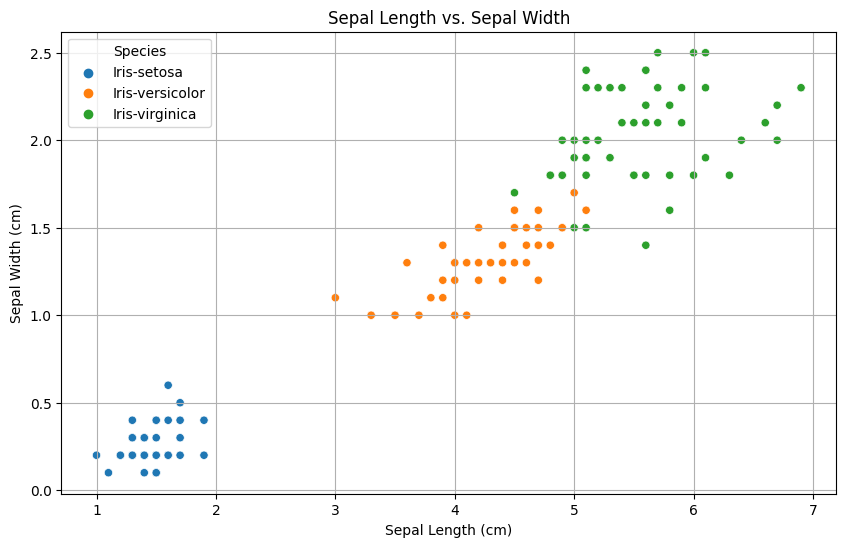

In [202]:
# Wykres 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

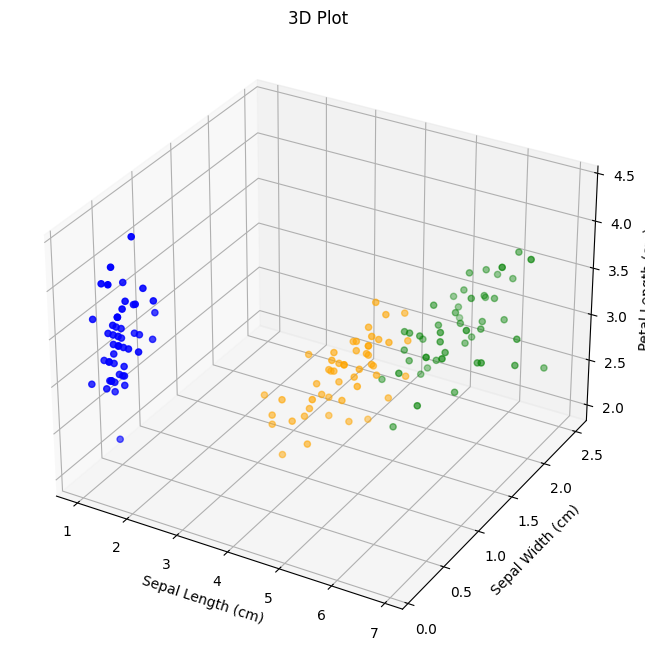

In [203]:
# Wykres 3D
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'}

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['PetalLengthCm'], data['PetalWidthCm'], data['SepalWidthCm'], color=data['Species'].map(colors))

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Plot')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

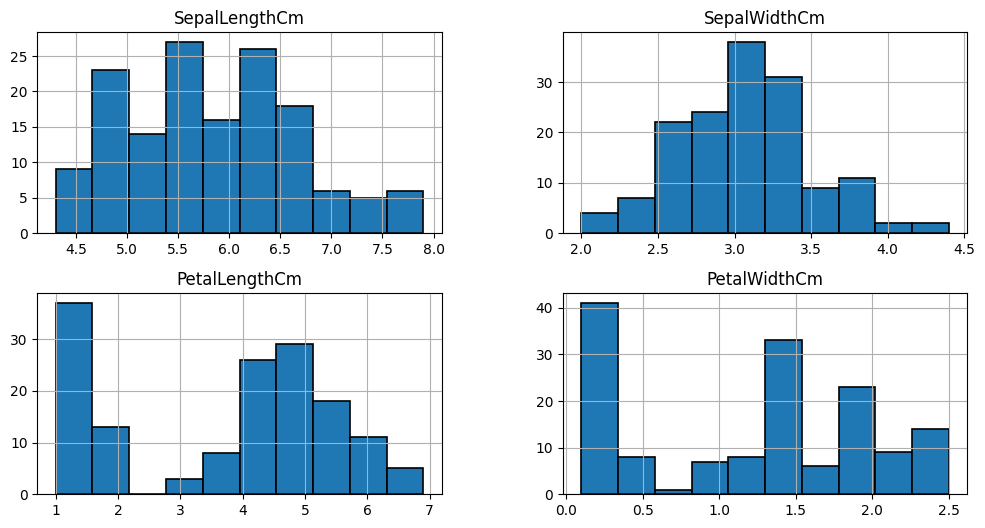

In [204]:
# Rozkład próbek
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show

Można stworzyć jeszcze wiele innych wizualizacji w zależności od tego co potrzebujemy (na przykład wykresy słupkowe, oszacować wariancję, obciążenie, standardową dewiację itp.). Przydatna jest wiedza ekspercka dotycząca zależności między cechami. Same korelacje możemy obliczyć z następującego kodu.

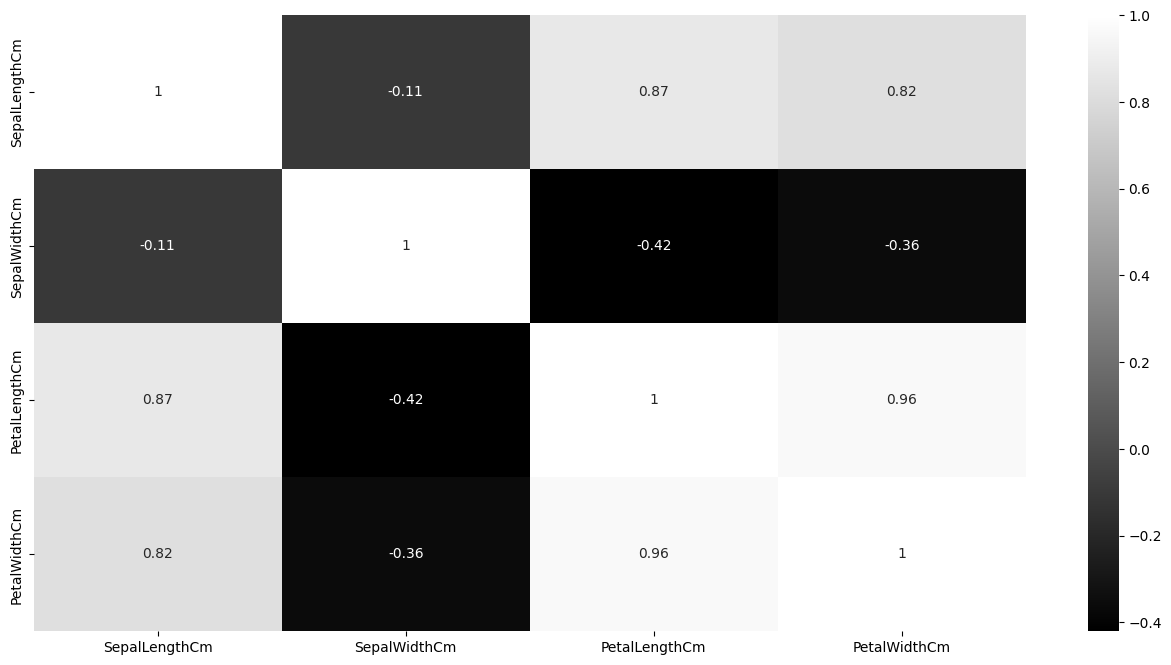

In [205]:
plt.figure(figsize=(16,8))
sns.heatmap(data.drop("Species", axis=1).corr(),annot=True,cmap='gray')
plt.show()

Korelacja bilsko wartości -1 lub 1 oznacza kolejnko silnie ujemną lub silnie dodatnią czyli wraz ze zmianą jednej wartości druga maleje lub rośnie. Wartości bliskie 0 (śćiśle statystycznie oznaczają, że wartości są niezależne) oznaczają brak korelacji lub brak liniowej zależności

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/Correlation.png" alt="drawing" style="width:900px;"/>
</div>

<br>

Jeśli otrzymamy cechy o korelacji 1 lub -1 należy zastanowić się nad usunięciem jednej z nich, ponieważ przekazują one tę samą informację.

## Część ML

In [206]:
import sklearn.model_selection

In [207]:
# train, test = sklearn.model_selection.train_test_split(data, test_size=0.3, random_state=42, shuffle=True)
train, test = sklearn.model_selection.train_test_split(data, test_size=0.3, shuffle=True)

Zbiór danych został podzielony na zbiór uczący (treningowy) i testowy. Jako że nie będzie przeprowadzone dostrajanie hiperparametróœ to można odpuścić sobie zbiór walidacyjny. **UWAGA** ukazana wyżej metoda jest "brzydka" w porządnym kodzie należy korzystać z metody k-krzyżowej walidacji.

In [208]:
print(train.head(5))
print(train.shape)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
62             6.0           2.2            4.0           1.0  Iris-versicolor
42             4.4           3.2            1.3           0.2      Iris-setosa
135            7.7           3.0            6.1           2.3   Iris-virginica
11             4.8           3.4            1.6           0.2      Iris-setosa
63             6.1           2.9            4.7           1.4  Iris-versicolor
(105, 5)


In [209]:
from tabulate import tabulate

# Trochę ładniejsza tabela :)
print(tabulate(test.head(5), headers = 'keys', tablefmt = 'psql'))
print(test.shape)

+-----+-----------------+----------------+-----------------+----------------+-----------------+
|     |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | Species         |
|-----+-----------------+----------------+-----------------+----------------+-----------------|
|   3 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
| 131 |             7.9 |            3.8 |             6.4 |            2   | Iris-virginica  |
|  60 |             5   |            2   |             3.5 |            1   | Iris-versicolor |
|  93 |             5   |            2.3 |             3.3 |            1   | Iris-versicolor |
|  47 |             4.6 |            3.2 |             1.4 |            0.2 | Iris-setosa     |
+-----+-----------------+----------------+-----------------+----------------+-----------------+
(45, 5)


In [210]:
train_X = train.drop("Species", axis=1)
train_Y = train["Species"]

test_X = test.drop("Species", axis=1)
test_Y = test["Species"]

In [211]:
print(tabulate(test_X.head(5), headers = 'keys', tablefmt = 'psql'))
print(test_X.shape)

print("---------------------------")

print(test_Y.head(5))
print(test_Y.shape)

+-----+-----------------+----------------+-----------------+----------------+
|     |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm |
|-----+-----------------+----------------+-----------------+----------------|
|   3 |             4.6 |            3.1 |             1.5 |            0.2 |
| 131 |             7.9 |            3.8 |             6.4 |            2   |
|  60 |             5   |            2   |             3.5 |            1   |
|  93 |             5   |            2.3 |             3.3 |            1   |
|  47 |             4.6 |            3.2 |             1.4 |            0.2 |
+-----+-----------------+----------------+-----------------+----------------+
(45, 4)
---------------------------
3          Iris-setosa
131     Iris-virginica
60     Iris-versicolor
93     Iris-versicolor
47         Iris-setosa
Name: Species, dtype: object
(45,)


### Stwórzmy 4 modele i sprawdżmy jak sobie radzą

In [212]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

from sklearn import metrics #for checking the model accuracy

In [213]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 1.0


/home/aleksander.kolodziej@A4BEE.ad/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
# Support Vector Machine (classification)

model = svm.SVC()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction,test_Y))

The accuracy of the SVM is: 1.0


In [215]:
# KNN

model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,test_Y))

The accuracy of the KNN is 1.0


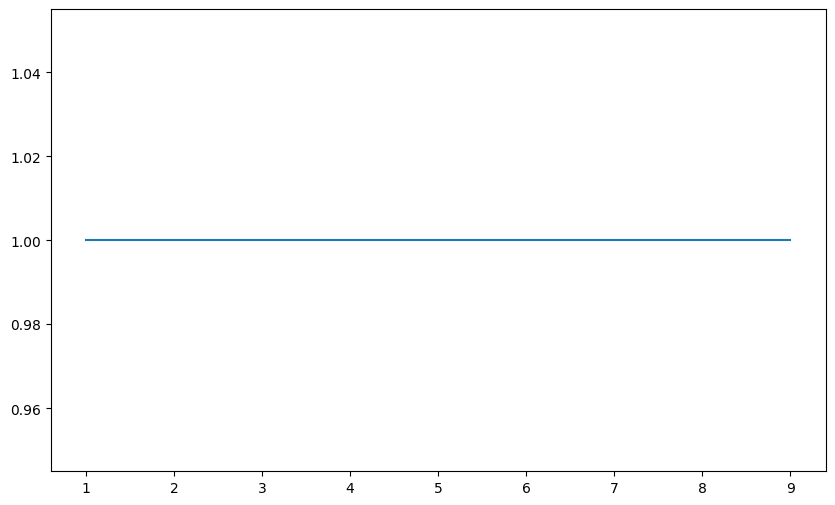

In [216]:
knn = []
n_list = []

for n in range(1,10):
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    knn.append(metrics.accuracy_score(prediction,test_Y))
    n_list.append(n)

fig = plt.figure(figsize=(10,6))
plt.plot(n_list, knn)


In [217]:
# Decision tree

model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.9111111111111111


### Jak określić dokładność / celność w problemie klasyfikacji?

Skupmy się na jednym modelu, np. Drzewie Decycyjnym, dla każdej predykcji modelu zwraca on swoją prognozę (etykietę). Tworząc "wykres" przewidywań rzeczywistych od modelu uzyskać można tzw. macierz konfuzji. W przykładzie teoretycznym wygląda ona następująco:

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/cm.png" alt="drawing" style="width:900px;"/>
</div>

Czym są True positive?
    Model poprawnie przewidział rzeczywistą etykietę (klasy 1)

Czym są True negative?
    Model poprawnie przewidział rzeczywistą etykietę (klasy 2)

Czym są False positive?
    Model żle przewidział rzeczywistą etyketę (klasy 2)

Czym są False negative?
    Model żle przewidział rzeczywistą etyketę (klasy 1)

<br>

W przypadku naszego modelu macierz konfuzji wygląda następująco:

<Axes: >

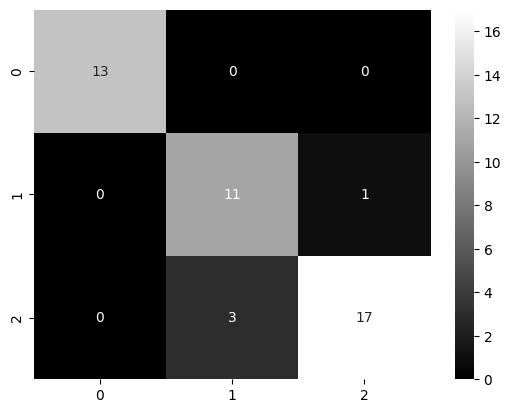

In [218]:
confusion_matrix = metrics.confusion_matrix(prediction, test_Y)
sns.heatmap(confusion_matrix, cmap="gray", annot=True)

Aby mnieć lepszy wgląd w błędy należy ustawić przekątne na wartość 0

<Axes: >

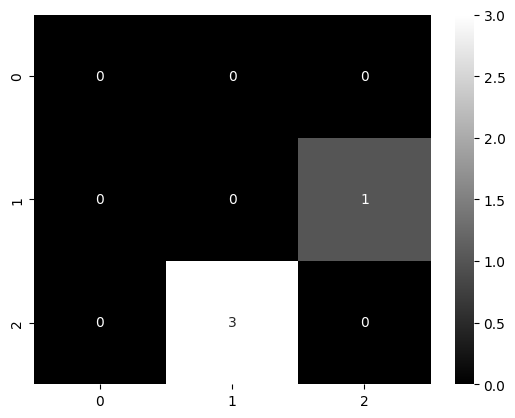

In [219]:
np.fill_diagonal(confusion_matrix, 0)
sns.heatmap(confusion_matrix, cmap="gray", annot=True)

Jak lepiej zrrozumieć False positive and False negative i dlaczego należy zwracać na nie uwagę?

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/type_of_errors.jpg" alt="drawing" style="width:500px;"/>
</div>

<br>

Należy zakładać, że model nigdy nie będzie miał celności 100%, dlatego trzeba się zastanowić czy lepiej mieć więcej False positivów czy False negativów, ponieważ jedne błędy będą prowadzić do katastrowy, podczas gdy inne do fałszywego alarmu. Wartości te określają parametry **PRECYZJI** i **PEŁNOŚCI**

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/cm.png" alt="drawing" style="width:650px;"/>
</div>

Precyzja:

$
\text{Precyzja} = \frac{PP}{PP + FP}
$

Pełność:

$
\text{Pełność} = \frac{PP}{PP + FN}
$

In [220]:
print(f"Wynik precyzji dla modelu to {metrics.precision_score(prediction, test_Y, average=None)}")
print(f"Wynik pełnośi dla modelu to {metrics.recall_score(prediction, test_Y, average=None)}")

Wynik precyzji dla modelu to [1.         0.78571429 0.94444444]
Wynik pełnośi dla modelu to [1.         0.91666667 0.85      ]


Często wygodnie połączyć precyzję i pełność w jedną metrykę zwaną **F1**. Wynik F1 stanowi średnią harmoniczną precyzji i pełności. Standardowa średnia traktuje wszystkie wartości jednakowo, natomiast średnia harmoniczna nadaje większą wagę małym wartością. W rezultacie klasyfikator będzie miał dużą wartość F1, gdy zarówno precyzja i pełność będą miały dużą wartość.

In [221]:
print(f"Wynik pełnośi dla modelu to {metrics.f1_score(prediction, test_Y, average=None)}")

Wynik pełnośi dla modelu to [1.         0.84615385 0.89473684]


**UWAGA** Wskaźnik F1 faworyzuje zbliżone do siebie wartości precyzji i pełności, natomiast nie zawsze nam na tym zależy (przykład powyżej)

Jak uzyskać kompromis pomiędzy precyzjją, a pełnością?

W klasyfikacji wynik każdej próbki zostaje wyliczony na podstawie funkcji decyzyjnej. Zmieniając wartość tego progu, zmieniać się będzie precyzja oraz pełność

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/progi.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Rysując wykres "wszystkich" możliwości można dowolnie manipulować wartością precyzji i pełności

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/stability.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Wykres precyzji od pełności

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/prec-rec.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

Wykres krzywej ROC (charakterystyki roboczej odbiornika (ang. *receiver operating characteristic*) )

<br>

<div style="text-align: centered;">
    <img src="Zdjęcia/Szkolenie_2/ROC.jpg" alt="drawing" style="width:900px;"/>
</div>

<br>

### Klasyfikacja wieloklasowa

Klasyfikacja nie musi rozwiązywać problemu binarnego (chociaż w głównej mierze będzie do takiej sprowadzana). W powyższym przykładzie istnieją 3 klasy. Otrzymaliśmy jedną celność (która nie jest tym za co się podaje).

<br>

Jednym podejściem w klasyfikacji więcej niż jednej klasy jest stworzenie n binarnych modeli, uzyskanie wyniku dla każdego z nich i wyvranie modelu, który uzyskał najlepszy wynik. Jest to strategia **jeden przeciw wszystkim** (ang. *one-vs-all OvA*) lub **jeden przeciw reszcie** (ang. *one-vs-rest OvR*).

<br>

Innym roziązaniem jest wyuczenie modelu dla każdej pary klas, **jeden przeciw jednemu** (*one-vs-one OvO*). Dla N klas należy wytrenować $N*(N-1)/2$ modeli, w naszym przypadku 3 x 2 / 2 = 3, ale dla 10 klas jest to już 10 x 9 / 2= 45

<br>

Sklearn domyślnie zastosuje strategię OvA, wyjątkiem jest model SVM, gdzie bardziej wydajnym rozwiązaniem jest OvO.

In [222]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(train_X, train_Y)
results = sgd_clf.decision_function(np.array([[4.6,3.4,1.4,0.3]]))
print(results)

[[ 181.6051123   -66.80681283 -407.84810176]]


/home/aleksander.kolodziej@A4BEE.ad/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


# Zadanie warsztatowe/domowe

1. Zrobić projekt na podstawie tego datasetu: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data (można inny jeśli ktoś chce :)

2. Oglądnąć szkolenie Adriana Urbana dotyczące algorytmów ML: https://drive.google.com/file/d/1HT-pZ6kusKaw-orLZ04THAYjRkBNEqlp/view